In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
#from datetime import timedelta
#from datetime import datetime
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
#import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import calendar
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import dmba
import math
import copy
from statsmodels.formula.api import ols
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [3]:
bank = pd.read_csv('BankChurners.csv')

###### 1. List the basic descriptive statistics for all numerical variables and counts of different values for all categorical variables.

In [4]:
#Detail about dataset variables and data types
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
#Basic descriptive Statistics for all numerical variables
describe = bank.describe().round(2)
describe2=describe.T
describe2.round(2)
#describe2.to_excel('Assignment1Q1.1.xlsx') #Download output into excel format

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,36903783.45,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.633000e+01,8.02,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.350000e+00,1.30,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.593000e+01,7.99,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.810000e+00,1.55,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.340000e+00,1.01,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.460000e+00,1.11,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631950e+03,9088.78,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162810e+03,814.99,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9090.69,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [6]:
#Counts of different values for all categorical variables.
cat_cols = bank.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    bank[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column          value                    
Attrition_Flag  Attrited Customer    1627
                Existing Customer    8500
Card_Category   Platinum               20
                Gold                  116
                Silver                555
                Blue                 9436
Education_Level Doctorate             451
                Post-Graduate         516
                College              1013
                Uneducated           1487
                Unknown              1519
                High School          2013
                Graduate             3128
Gender          M                    4769
                F                    5358
Income_Category $120K +               727
                Unknown              1112
                $60K - $80K          1402
                $80K - $120K         1535
                $40K - $60K          1790
                Less than $40K       3561
Marital_Status  Divorced              748
                Unknown               749
                Single               3943
                Married              4687

###### 2. Make comparison between existing customers and attrited customers in terms of their ages, genders, incomes, credit limits, transaction amounts, transaction counts and utilization ratios. And draw some plots to illustrate the differences or similarities.

In [7]:
comp1 = bank[['Attrition_Flag','Customer_Age', 'Gender','Income_Category','Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct','Avg_Utilization_Ratio']].groupby("Attrition_Flag").agg({'Customer_Age':['mean','min','max','std'],'Gender':['min','max','count'],'Income_Category':['min','max','count'],'Credit_Limit':['mean','min','max','std'],'Total_Trans_Amt':['mean','min','max','std'],'Total_Trans_Ct':['mean','min','max','std'],'Avg_Utilization_Ratio':['mean','min','max','std']})
comp2=comp1.T
comp2.round(2)
#comp2.to_excel('Assignment1Q2.xlsx')#download output in excel format


Attrition_Flag              Attrited Customer Existing Customer
Customer_Age          mean            46.6595           46.2621
                      min                  26                26
                      max                  68                73
                      std             7.66565           8.08116
Gender                min                   F                 F
                      max                   M                 M
                      count              1627              8500
Income_Category       min             $120K +           $120K +
                      max             Unknown           Unknown
                      count              1627              8500
Credit_Limit          mean            8136.04           8726.88
                      min              1438.3            1438.3
                      max               34516             34516
                      std             9095.33           9084.97
Total_Trans_Amt       mean            3095.03           4654.66
                      min                 510               816
                      max               10583             18484
                      std             2308.23           3512.77
Total_Trans_Ct        mean            44.9336           68.6726
                      min                  10                11
                      max                  94               139
                      std             14.5684            22.919
Avg_Utilization_Ratio mean           0.162475          0.296412
                      min                   0                 0
                      max               0.999             0.994
                      std            0.264458          0.272568

In [8]:
comparision2 = bank[['Attrition_Flag',"Customer_Age",'Gender','Income_Category','Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct','Avg_Utilization_Ratio']].groupby(["Attrition_Flag",'Gender','Income_Category']).agg('count')
comparision2

Customer_Age  Credit_Limit  \
Attrition_Flag    Gender Income_Category                               
Attrited Customer F      $40K - $60K               166           166   
                         Less than $40K            582           582   
                         Unknown                   182           182   
                  M      $120K +                   126           126   
                         $40K - $60K               105           105   
                         $60K - $80K               189           189   
                         $80K - $120K              242           242   
                         Less than $40K             30            30   
                         Unknown                     5             5   
Existing Customer F      $40K - $60K               848           848   
                         Less than $40K           2702          2702   
                         Unknown                   878           878   
                  M      $120K +                   601           601   
                         $40K - $60K               671           671   
                         $60K - $80K              1213          1213   
                         $80K - $120K             1293          1293   
                         Less than $40K            247           247   
                         Unknown                    47            47   

                                          Total_Trans_Amt  Total_Trans_Ct  \
Attrition_Flag    Gender Income_Category                                    
Attrited Customer F      $40K - $60K                  166             166   
                         Less than $40K               582             582   
                         Unknown                      182             182   
                  M      $120K +                      126             126   
                         $40K - $60K                  105             105   
                         $60K - $80K                  189             189   
                         $80K - $120K                 242             242   
                         Less than $40K                30              30   
                         Unknown                        5               5   
Existing Customer F      $40K - $60K                  848             848   
                         Less than $40K              2702            2702   
                         Unknown                      878             878   
                  M      $120K +                      601             601   
                         $40K - $60K                  671             671   
                         $60K - $80K                 1213            1213   
                         $80K - $120K                1293            1293   
                         Less than $40K               247             247   
                         Unknown                       47              47   

                                          Avg_Utilization_Ratio  
Attrition_Flag    Gender Income_Category                         
Attrited Customer F      $40K - $60K                        166  
                         Less than $40K                     582  
                         Unknown                            182  
                  M      $120K +                            126  
                         $40K - $60K                        105  
                         $60K - $80K                        189  
                         $80K - $120K                       242  
                         Less than $40K                      30  
                         Unknown                              5  
Existing Customer F      $40K - $60K                        848  
                         Less than $40K                    2702  
                         Unknown                            878  
                  M      $120K +                            601  
                         $40K - $60K                        671  
    

In [9]:
comparision = bank[['Attrition_Flag','Customer_Age', 'Gender','Income_Category','Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct','Avg_Utilization_Ratio']].groupby("Attrition_Flag").describe().round(2)
com_transposed = comparision.T
com_transposed

Attrition_Flag               Attrited Customer  Existing Customer
Customer_Age          count            1627.00            8500.00
                      mean               46.66              46.26
                      std                 7.67               8.08
                      min                26.00              26.00
                      25%                41.00              41.00
                      50%                47.00              46.00
                      75%                52.00              52.00
                      max                68.00              73.00
Credit_Limit          count            1627.00            8500.00
                      mean             8136.04            8726.88
                      std              9095.33            9084.97
                      min              1438.30            1438.30
                      25%              2114.00            2602.00
                      50%              4178.00            4643.50
                      75%              9933.50           11252.75
                      max             34516.00           34516.00
Total_Trans_Amt       count            1627.00            8500.00
                      mean             3095.03            4654.66
                      std              2308.23            3512.77
                      min               510.00             816.00
                      25%              1903.50            2384.75
                      50%              2329.00            4100.00
                      75%              2772.00            4781.25
                      max             10583.00           18484.00
Total_Trans_Ct        count            1627.00            8500.00
                      mean               44.93              68.67
                      std                14.57              22.92
                      min                10.00              11.00
                      25%                37.00              54.00
                      50%                43.00              71.00
                      75%                51.00              82.00
                      max                94.00             139.00
Avg_Utilization_Ratio count            1627.00            8500.00
                      mean                0.16               0.30
                      std                 0.26               0.27
                      min                 0.00               0.00
                      25%                 0.00               0.06
                      50%                 0.00               0.21
                      75%                 0.23               0.53
                      max                 1.00               0.99

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

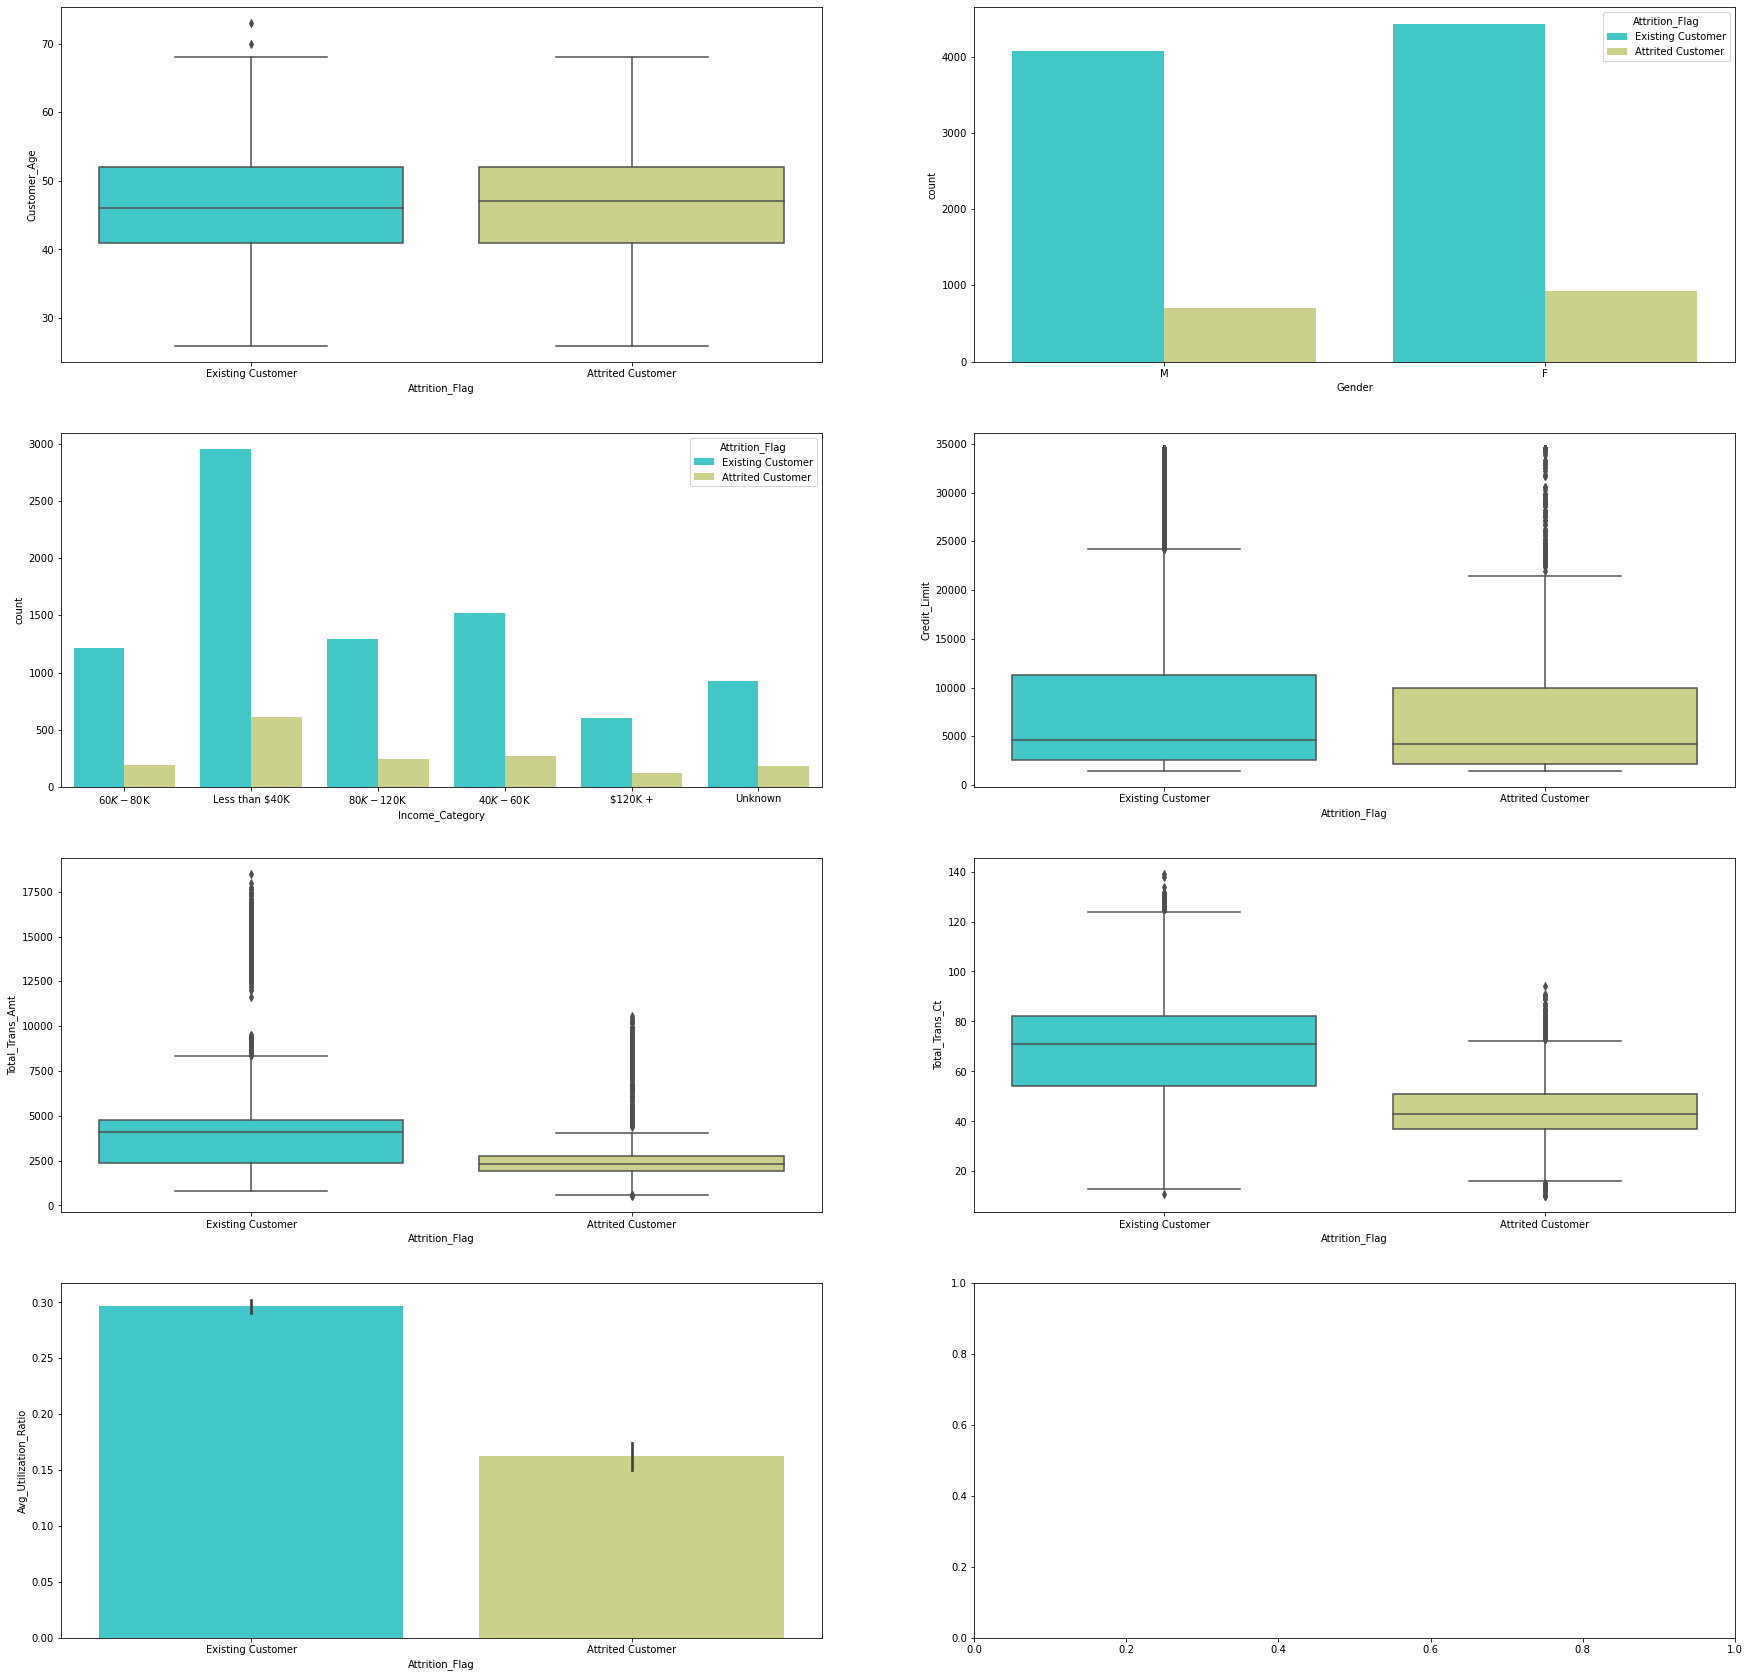

In [12]:
fig_housing, ax = plt.subplots(4,2, figsize=(30,30))
sns.boxplot(y='Customer_Age', x='Attrition_Flag', data=bank, palette='rainbow', ax=ax[0,0])
sns.countplot(x='Gender', data=bank , hue = 'Attrition_Flag',palette='rainbow', ax=ax[0,1])
sns.countplot(x='Income_Category', hue = 'Attrition_Flag', data = bank, palette='rainbow',ax=ax[1,0])
sns.boxplot(y='Credit_Limit', x="Attrition_Flag", data = bank, palette='rainbow',ax=ax[1,1])
sns.boxplot(y='Total_Trans_Amt', x="Attrition_Flag", data = bank, palette='rainbow',ax=ax[2,0])
sns.boxplot(y='Total_Trans_Ct', x="Attrition_Flag", data = bank,palette='rainbow', ax=ax[2,1])
sns.barplot(y='Avg_Utilization_Ratio', x="Attrition_Flag", data = bank, palette='rainbow', ax=ax[3,0])
#fig.savefig('bank.pdf')

<AxesSubplot:title={'center':'Customer Age Distribution'}, xlabel='Attrition_Flag', ylabel='Customer_Age'>

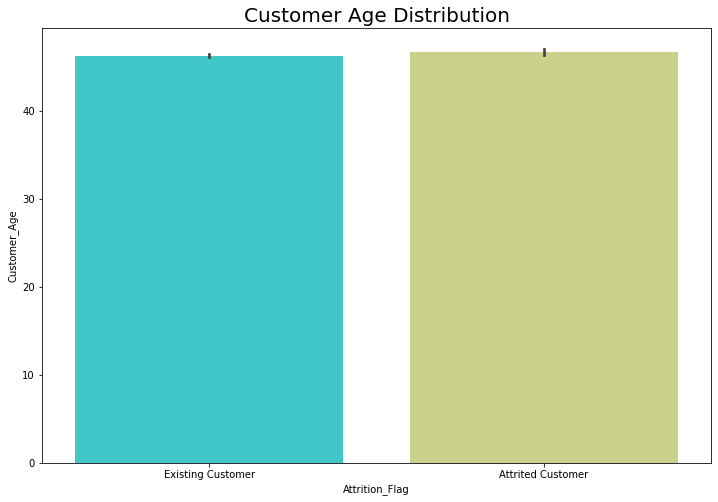

In [13]:
fig_housing, ax = plt.subplots(1, figsize=(12,8))
ax.set_title("Customer Age Distribution", fontsize=20)
sns.barplot(y='Customer_Age', x='Attrition_Flag', data=bank, palette='rainbow')

<AxesSubplot:title={'center':'Gender Distribution'}, xlabel='Gender', ylabel='count'>

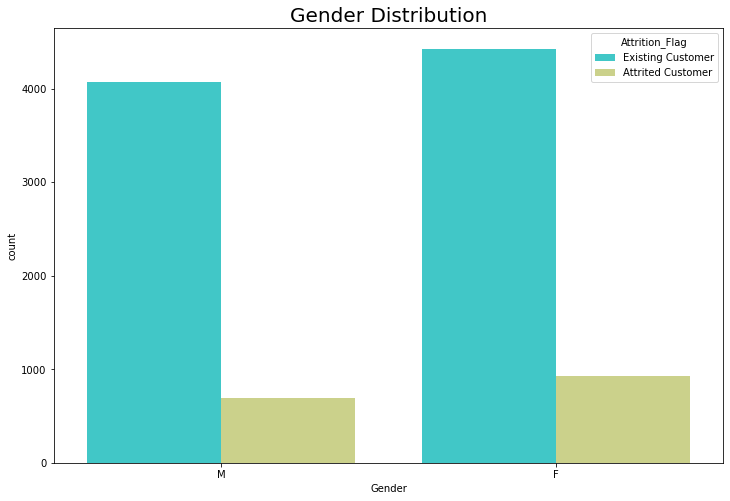

In [14]:
fig_housing, ax = plt.subplots(1, figsize=(12,8))
ax.set_title("Gender Distribution", fontsize=20)
sns.countplot(x='Gender', data=bank , hue = 'Attrition_Flag',palette='rainbow')

<AxesSubplot:title={'center':'Income Category Distribution'}, xlabel='Income_Category', ylabel='count'>

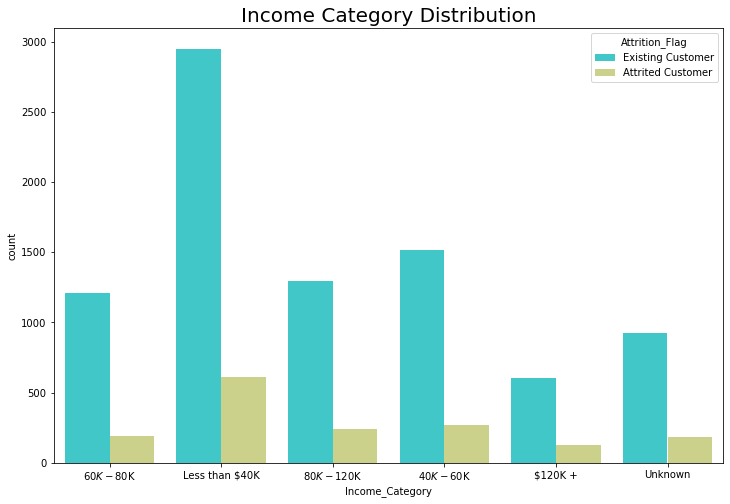

In [15]:
fig_housing, ax = plt.subplots(1, figsize=(12,8))
ax.set_title("Income Category Distribution", fontsize=20)
sns.countplot(x='Income_Category', hue = 'Attrition_Flag', data = bank, palette='rainbow')

<AxesSubplot:title={'center':'Exsiting & Attrited Customers Credit Limit Comparison'}, xlabel='Attrition_Flag', ylabel='Credit_Limit'>

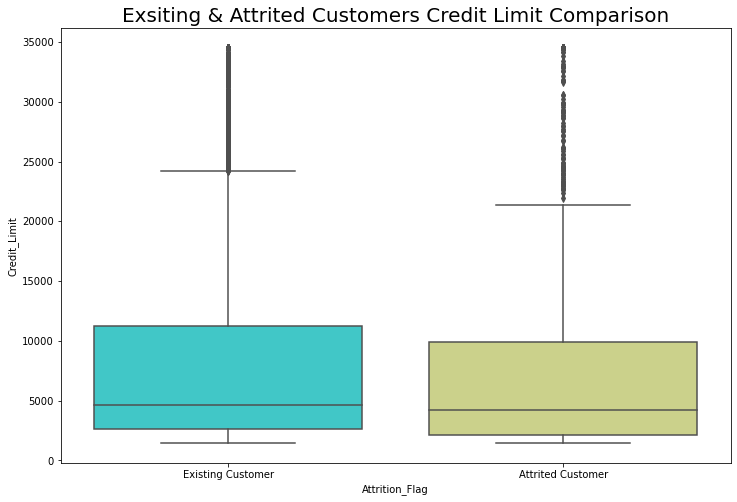

In [16]:
fig_housing, ax = plt.subplots(1, figsize=(12,8))
ax.set_title("Exsiting & Attrited Customers Credit Limit Comparison", fontsize=20)
sns.boxplot(y='Credit_Limit', x="Attrition_Flag", data = bank, palette='rainbow')

<AxesSubplot:title={'center':'Existing & Attrited Customers Transaction Amount Comparison'}, xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

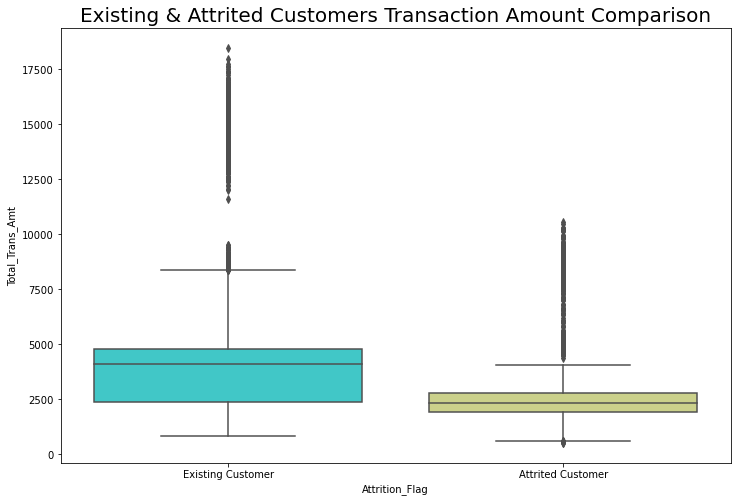

In [17]:
fig_housing, ax = plt.subplots(1, figsize=(12,8))
ax.set_title("Existing & Attrited Customers Transaction Amount Comparison", fontsize=20)
sns.boxplot(y='Total_Trans_Amt', x="Attrition_Flag", data = bank, palette='rainbow')

<AxesSubplot:title={'center':'Existing & Attrited Total Transaction Counts Comparison'}, xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

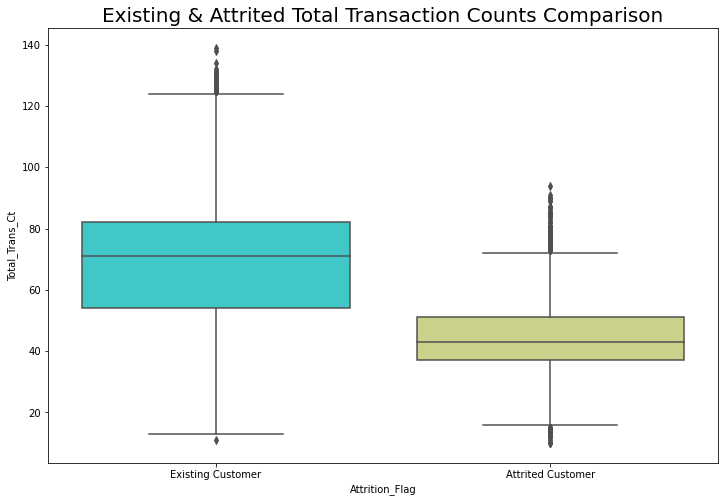

In [18]:
fig_housing, ax = plt.subplots(1, figsize=(12,8))
ax.set_title("Existing & Attrited Total Transaction Counts Comparison", fontsize=20)
sns.boxplot(y='Total_Trans_Ct', x="Attrition_Flag", data = bank,palette='rainbow')

<AxesSubplot:title={'center':'Customer Comparison of Utilization Ratios'}, xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

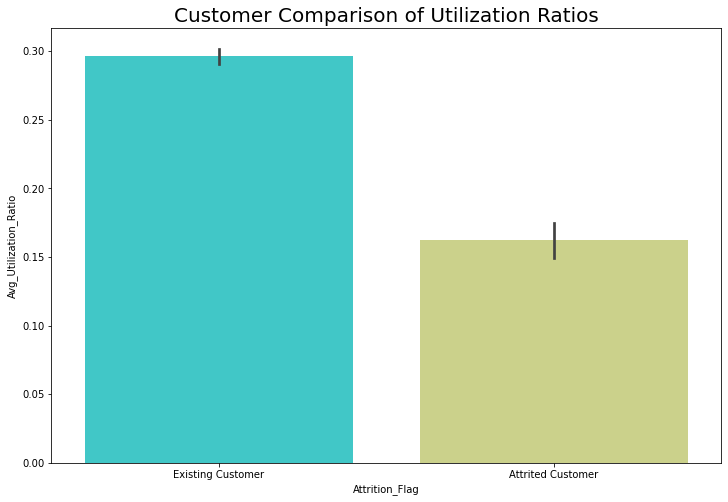

In [19]:
fig_housing, ax = plt.subplots(1, figsize=(12,8))
ax.set_title("Customer Comparison of Utilization Ratios", fontsize=20)
sns.barplot(y='Avg_Utilization_Ratio', x="Attrition_Flag", data = bank, palette='rainbow')

###### 3. Is there any age difference between existing customers and churners? Is there any gender difference between existing customers and churners? Use appropriate statistical tools to prove your points.

In [20]:
#Check age difference between existing customers and churners
Attrited = bank[bank["Attrition_Flag"]=='Attrited Customer']['Customer_Age']
Exist = bank[bank["Attrition_Flag"]=='Existing Customer']['Customer_Age']
two= stats.ttest_ind(Attrited, Exist)
two

Ttest_indResult(statistic=1.8319590211710879, pvalue=0.06698688501759036)

In [32]:
#Check gender difference between existing customers and churner
contingency_table=pd.crosstab(bank["Gender"],bank["Attrition_Flag"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
if p_value<=alpha:
    print("Reject H0,There is a relation in gender difference between existing customer and churners.")
else:
    print("Retain H0,There is no relation in gender difference between existing customer and churners.")

contingency_table :-
 Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                             930               4428
M                             697               4072
Observed Values :-
 [[ 930 4428]
 [ 697 4072]]
Expected Values :-
 [[ 860.81425891 4497.18574109]
 [ 766.18574109 4002.81425891]]
Degree of Freedom:- 1
chi-square statistic:- 14.068218798353648
critical_value: 3.841458820694124
p-value: 0.00017629768002802582
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relation in gender difference between existing customer and churners.


In [33]:
# Alternative solution showed same output as above
contingency_table=pd.crosstab(bank["Gender"],bank["Attrition_Flag"])
contingency_table
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))

dof=1
[[ 860.81425891 4497.18574109]
 [ 766.18574109 4002.81425891]]
probability=0.950, critical=3.841, stat=13.866
Dependent (reject H0)
significance=0.050, p=0.000


###### 4. You may find that the “average_utilization_ratio” are different for attrited and existing customers. Is this pattern different for customer groups of different education level? For simplicity, we re-code the education levels as two groups: those graduated from universities and others.

In [34]:
#Check “average_utilization_ratio” difference between existing customers and churners
Attrited = bank[bank["Attrition_Flag"]=='Attrited Customer']['Avg_Utilization_Ratio']
Exist = bank[bank["Attrition_Flag"]=='Existing Customer']['Avg_Utilization_Ratio']
stats.ttest_ind(Attrited, Exist)

Ttest_indResult(statistic=-18.244911490565563, pvalue=3.35768932824574e-73)

In [35]:
p_value = 3.35768932824574e-73
alpha = 0.05
if p_value<=alpha:
     print("Reject H0, mean difference between average utilization ratio and existing customers & churners is not 0")
else:
    print("Retain H0,mean difference between average utilization ratio and existing customers & churners is 0.")

Reject H0, mean difference between average utilization ratio and existing customers & churners is not 0


In [36]:
#Encoding values of Education_Level
bank_df = bank.copy()
bank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [37]:
bank_df["Education_Level"].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [38]:
cleanup = {"Education_Level": {"Graduate": "Graduated from universities","High School": "Others", "Unknown": "Others", "Uneducated":"Others", "College": "Graduated from universities", "Post-Graduate": "Graduated from universities", "Doctorate": "Graduated from universities" }}
bank_df = bank_df.replace(cleanup)
bank_df.head()
bank_df["Education_Level"].value_counts()

Graduated from universities    5108
Others                         5019
Name: Education_Level, dtype: int64

In [39]:
#Check “average_utilization_ratio” difference between existing customers and churners
Graduated = bank_df[bank_df["Education_Level"]=='Graduated from universities']['Avg_Utilization_Ratio']
Other = bank_df[bank_df["Education_Level"]=='Others']['Avg_Utilization_Ratio']
stats.ttest_ind(Graduated, Other)

Ttest_indResult(statistic=-0.30906068996642716, pvalue=0.7572817202991393)